# In this notebook, we will use the obesity, diabetes, low access to vehicles, and low income to predict whether a census tract has low access to healthy food. #


In [2]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, plot_confusion_matrix, recall_score

In [3]:
food_obesity = pd.read_csv('./data/food_obesity.csv')
food_diabetes = pd.read_csv('./data/food_diabetes.csv')

In [4]:
# Convert from raw SNAP participation numbers to percent participation.
food_obesity['TractSNAP_percent'] = food_obesity['TractSNAP'] / food_obesity['Pop2010']
food_diabetes['TractSNAP_percent'] = food_diabetes['TractSNAP'] / food_diabetes['Pop2010']

In [4]:
food_obesity.shape, food_diabetes.shape

((784, 36), (729, 40))

In [5]:
food_obesity_diabetes = food_obesity.merge(food_diabetes[['Tract', 'HCSDIAP_2016-2018']], how = 'right', on = 'Tract')

In [6]:
food_obesity_diabetes.to_csv('./data/food_obesity_diabetes.csv')

In [7]:
baseline = food_obesity_diabetes['LATracts_half'].value_counts(normalize = True)

In [8]:
baseline

0    0.640604
1    0.359396
Name: LATracts_half, dtype: float64

In [9]:
baseline_acc = baseline[0]

#### Baseline accuracy is 64%

In [10]:
def log_regression_fit(df, features, target):
    
    '''
    This function will fits a logistic regression model
    df: dataframe
    features: list of features
    target: string of target name
    '''
    
    # set up train and test data
    X = df[features]
    y = df[target]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 3224, stratify = y)
    
    # scale the model
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    
    # fit the model
    logreg = LogisticRegression()
    logreg.fit(X_train, y_train)
    
    #calculate predictions
    preds = logreg.predict(X_test)
    
    # Print metrics
    print(f'Trainining accuracy score: {logreg.score(X_train, y_train)}')
    print(f'Training accuracy cross val score: {cross_val_score(logreg, X_train, y_train, cv = 5).mean()}')
    print(f'Testing accuracy score: {logreg.score(X_test, y_test)}')
    print(f'Testing accuracy cross val score: {cross_val_score(logreg, X_test, y_test, cv = 5).mean()}')
    print('---')
    print(f'Baseline accuracy: {baseline_acc}')
    print(f'Improvement over baseline: {logreg.score(X_test, y_test) - baseline_acc}')
    print('---')
    print(classification_report(y_test, preds))
    print('---')
    plot_confusion_matrix(logreg, X_test, y_test, cmap = 'viridis', values_format = 'd');
    return 
    

In [11]:
features_half_mile = ['LowIncomeTracts', 'HUNVFlag', 'TractSNAP_percent', 'HCSOBP_2016-2018', 'HCSDIAP_2016-2018']

Trainining accuracy score: 0.8388278388278388
Training accuracy cross val score: 0.8424520433694745
Testing accuracy score: 0.8524590163934426
Testing accuracy cross val score: 0.8524024024024023
---
Baseline accuracy: 0.6406035665294925
Improvement over baseline: 0.2118554498639501
---
              precision    recall  f1-score   support

           0       0.83      0.97      0.89       117
           1       0.91      0.65      0.76        66

    accuracy                           0.85       183
   macro avg       0.87      0.81      0.83       183
weighted avg       0.86      0.85      0.85       183

---


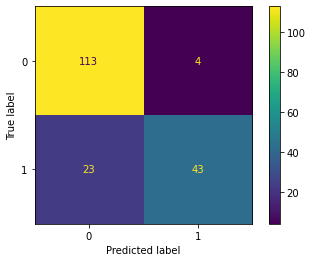

In [12]:
log_regression_fit(food_obesity_diabetes, features_half_mile, 'LATracts_half')

* Model is performing at 21% over baseline. 
* The model is slightly underfit. There is room to add more complexity and features.
* recall rate is 65% - percentage of actual low food access tracts that were correctly identified
* precision rate is 83% - percentage of actual no low food access tracts that were correctly identified
